In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud #for text data visualixation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


TensorFlow is a Python library for fast numerical computing created and released by Google. It is a foundation library that can be used to create Deep Learning models directly or by using wrapper libraries that simplify the process built on top of TensorFlow.
  In Deep Learning, Recurrent Neural Networks (RNN) are a family of neural networks that excels in learning from sequential data. A class of RNN that has found practical applications is Long Short-Term Memory (LSTM) because it is robust against the problems of long-term dependency.
  LSTM is mostly used in scenarios where we have no idea of the time duration and we need to process, classify and predict the series of time it will take. The use of the LSTM is mostly used for remembering the post data inside the system memory that is also considered as the updated or modified version of RNN that is a Recurrent neural network that makes the work of remembering easy.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer #used to tokenize the text data
from tensorflow.keras.preprocessing.sequence import pad_sequences #used to pad those datasets which are not long enough
from tensorflow.keras.models import Sequential #for feeding the model layers
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split #used to split dataset into train set and test set
from sklearn.metrics import classification_report, accuracy_score #used to measure the performance

In [ ]:
fake= pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/Fake.csv')

In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
fake['subject'].value_counts() #how many subjects of data are there

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


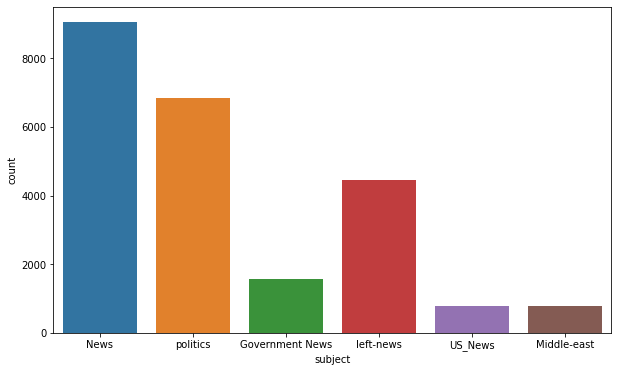

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot('subject',data=fake)

In [ ]:
text =' '.join(fake['text'].tolist())

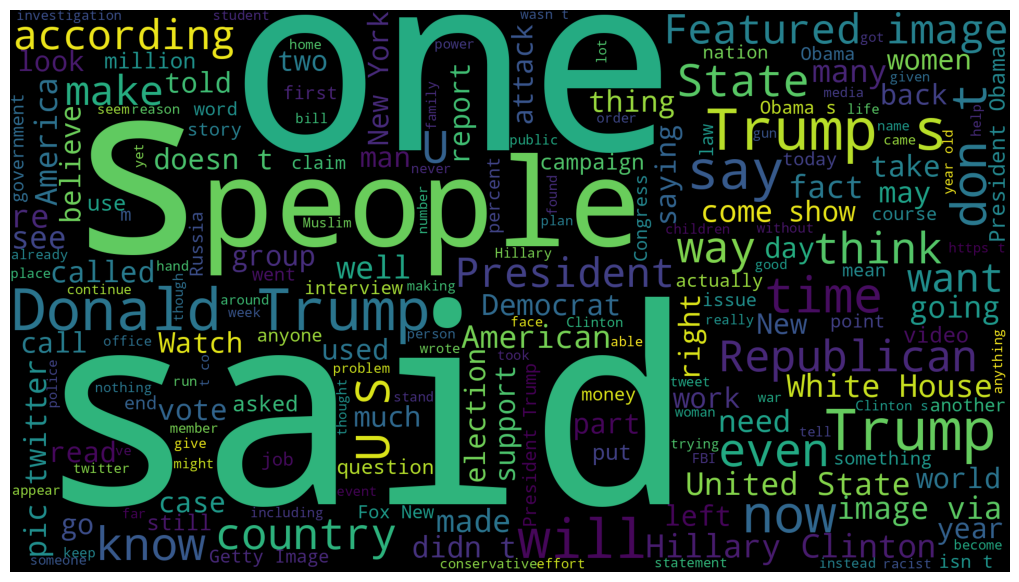

In [ ]:
wordcloud= WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
real= pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/True.csv')

In [ ]:
text =' '.join(real['text'].tolist())

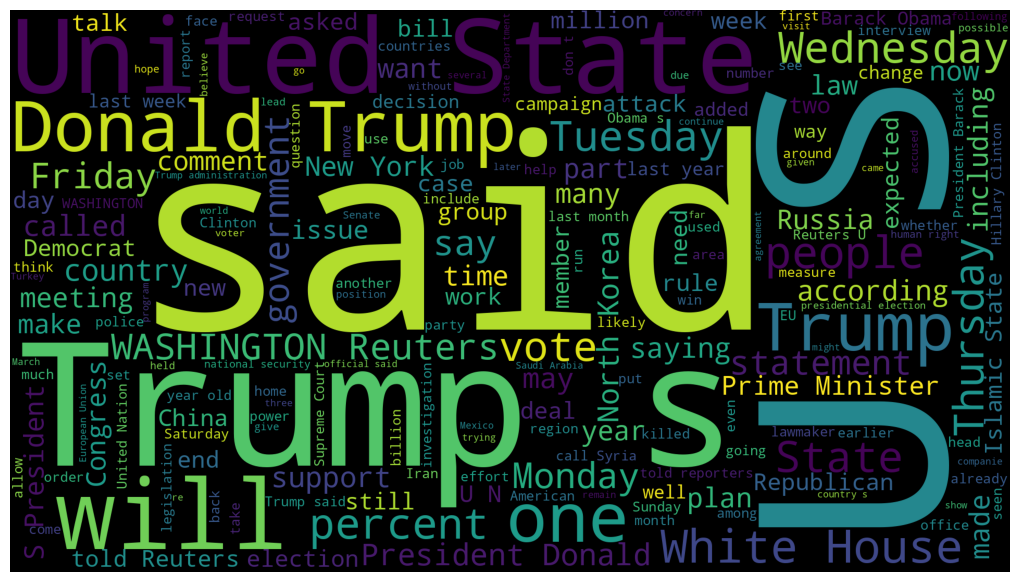

In [ ]:
wordcloud= WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**CLEANING DATA**

In [ ]:
real.sample(15)

,title,text,subject,date
11136,National Review magazine tells conservatives t...,DES MOINES (Reuters) - An influential conserva...,politicsNews,"January 22, 2016"
16116,UK parliament Speaker: there must be zero tole...,LONDON (Reuters) - The Speaker of Britain s pa...,worldnews,"October 30, 2017"
14641,Russia names nine U.S.-backed news outlets lik...,MOSCOW (Reuters) - Russia on Thursday named ni...,worldnews,"November 16, 2017"
3849,Four U.S. states sue Interior Department over ...,NEW YORK (Reuters) - Four U.S. states have sue...,politicsNews,"May 10, 2017"
16414,Germany investigating reports of refugees forc...,BERLIN (Reuters) - German authorities are inve...,worldnews,"October 26, 2017"
4199,Cannot be complacent about potential threat of...,LONDON (Reuters) - No one can be complacent ab...,politicsNews,"April 18, 2017"
4318,Belarus crackdown throws U.S. sanctions relief...,WASHINGTON (Reuters) - The Trump administratio...,politicsNews,"April 10, 2017"
10923,Former NYC Mayor Bloomberg says eyeing 2016 ru...,"(Reuters) - Michael Bloomberg, the billionaire...",politicsNews,"February 8, 2016"
7279,"Trump win, Democratic setbacks cloud Pelosi's ...",WASHINGTON (Reuters) - Nancy Pelosi may face a...,politicsNews,"November 14, 2016"
20394,"Militant blast, gun attack kill 18 police in E...","ISMAILIA, Egypt (Reuters) - Militants attacked...",worldnews,"September 11, 2017"


In [ ]:
unknown_publishers = []
for index, row in enumerate(real.text.values):
  try:
    record=row.split('-', maxsplit=1)
    record[1]
    assert(len(record[0])<120)
  except:
    unknown_publishers.append(index)

In [ ]:
len(unknown_publishers)

222

In [ ]:
real.iloc[unknown_publishers]

,title,text,subject,date
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
12,Factbox: Trump on Twitter (Dec 28) - Vanity Fa...,The following statements were posted to the ve...,politicsNews,"December 28, 2017"
13,"Trump on Twitter (Dec 27) - Trump, Iraq, Syria",The following statements were posted to the ve...,politicsNews,"December 28, 2017"
14,Man says he delivered manure to Mnuchin to pro...,"(In Dec. 25 story, in second paragraph, corre...",politicsNews,"December 25, 2017"
...,...,...,...,...
20135,China's big money trumps U.S. influence in Cam...,(Story corrects to million from billion in pa...,worldnews,"September 11, 2017"
20500,UK publisher rejected request to block academi...,"(This Sept 8 story corrects headline, clarifi...",worldnews,"September 8, 2017"
20667,Rohingya say their village is lost to Myanmar'...,"(Story refiles to add dropped word not , in ...",worldnews,"September 7, 2017"
21246,'Gates of Hell': Iraqi army says fighting near...,(Story corrects third paragraph to show Mosul...,worldnews,"August 29, 2017"


In [ ]:
real.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [ ]:
real = real.drop(8970, axis=0)

In [ ]:
publisher=[]
tmp_text=[]

for index, row in enumerate(real.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append('Unknown')
  else:
    record = row.split('-', maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())

In [ ]:
real['publisher']=publisher
real['text']=tmp_text

In [ ]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [ ]:
real.shape

(21416, 5)

In [ ]:
empty_fake_index=[index for index,text in enumerate(fake.text.tolist()) if str(text).strip()==""]

In [ ]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [ ]:
real['text']=real['title']+ " "+real['text']
fake['text']=fake['title']+ " "+fake['text']

In [ ]:
real['text']=real['text'].apply(lambda x: str(x).lower())
fake['text']=fake['text'].apply(lambda x: str(x).lower())

**Preprocessing Data**

In [ ]:
real['class']=1
fake['class']=0

In [ ]:
real.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [ ]:
real=real[['text','class']]
fake=fake[['text','class']]

In [ ]:
data=real.append(fake, ignore_index=True)


<ipython-input-28-18ab8edc16f1>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=real.append(fake, ignore_index=True)


In [ ]:
data.sample(5)

,text,class
16882,u.s. house to vote on non-nuclear iran sanctio...,1
15498,russia's lavrov says hopes syrian congress to ...,1
28735,watch this democratic congressman obliterate ...,0
371,white house open to small changes on corporate...,1
34034,berkeley college thugs form human chain to sto...,0


In [ ]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 50.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
2023-05-13 13:20:53.455864: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import preprocess_kgptalkie as ps

In [ ]:
data['text']=data['text'].apply(lambda x: ps.remove_special_chars(x))

In [ ]:
data.head()

,text,class
0,as us budget fight looms republicans flip thei...,1
1,us military to accept transgender recruits on ...,1
2,senior us republican senator let mr mueller do...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge much more...,1


**Vectorization**

In [ ]:
import gensim

In [ ]:
y=data['class'].values

In [ ]:
X=[d.split() for d in data['text'].tolist()]

In [ ]:
print(X[0])

['as', 'us', 'budget', 'fight', 'looms', 'republicans', 'flip', 'their', 'fiscal', 'script', 'the', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'us', 'congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speaking', 'on', 'cbs', 'face', 'the', 'nation', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues',

In [ ]:
DIM =100
w2v_model= gensim.models.Word2Vec(sentences= X, vector_size= DIM, window= 10, min_count=1)

In [ ]:
len(w2v_model.wv.vocab)

AttributeError: ignored

In [ ]:
w2v_model.wv.most_similar('trump')

[('trumps', 0.7253825068473816),
 ('trumpthe', 0.5690408945083618),
 ('he', 0.5474357604980469),
 ('trumptrump', 0.5354415774345398),
 ('presidentelect', 0.5333423018455505),
 ('trumpit', 0.5323589444160461),
 ('him', 0.5194587707519531),
 ('rumsfeld', 0.5059807896614075),
 ('rumseld', 0.5056098103523254),
 ('cruz', 0.5002824068069458)]

In [ ]:
tokenizer= Tokenizer()
tokenizer.fit_on_texts(X)#The fit_on_texts method is a part of Keras tokenizer class which is used to update the internal vocabulary for the texts list. We need to call be before using other methods of texts_to_sequences or texts_to_matrix.

In [ ]:
X = tokenizer.texts_to_sequences(X)

In [ ]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 'for': 9,
 's': 10,
 'is': 11,
 'he': 12,
 'said': 13,
 'trump': 14,
 'it': 15,
 'with': 16,
 'was': 17,
 'as': 18,
 'his': 19,
 'by': 20,
 'has': 21,
 'be': 22,
 'have': 23,
 'not': 24,
 'from': 25,
 'this': 26,
 'at': 27,
 'are': 28,
 'who': 29,
 'us': 30,
 'an': 31,
 'they': 32,
 'i': 33,
 'but': 34,
 'we': 35,
 'would': 36,
 'president': 37,
 'about': 38,
 'will': 39,
 'their': 40,
 'had': 41,
 'you': 42,
 't': 43,
 'been': 44,
 'were': 45,
 'people': 46,
 'more': 47,
 'or': 48,
 'after': 49,
 'which': 50,
 'she': 51,
 'her': 52,
 'one': 53,
 'if': 54,
 'its': 55,
 'out': 56,
 'all': 57,
 'what': 58,
 'state': 59,
 'when': 60,
 'new': 61,
 'also': 62,
 'up': 63,
 'there': 64,
 'over': 65,
 'no': 66,
 'house': 67,
 'donald': 68,
 'our': 69,
 'states': 70,
 'clinton': 71,
 'obama': 72,
 'government': 73,
 'can': 74,
 'just': 75,
 'him': 76,
 'so': 77,
 'than': 78,
 'republican': 79,
 'other': 80,
 'so

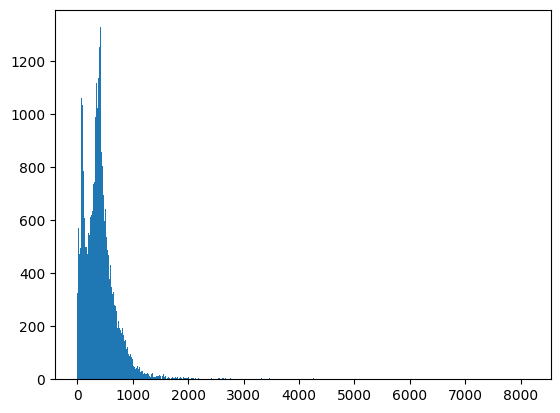

In [ ]:
plt.hist([len(x) for x in X], bins = 700)
plt.show()

In [ ]:
nos=np.array([len(x) for x in X])
len(nos[nos>1000])

1581

In [ ]:
maxlen=1000
X=pad_sequences(X,maxlen=maxlen)

In [ ]:
len(X[0])

1000

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [ ]:
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size, DIM))

  for word, i in vocab.items():
    weight_matrix[i]=model.wv[word]
  return weight_matrix


In [ ]:
embedding_vectors = get_weight_matrix(w2v_model)

In [ ]:
embedding_vectors.shape

(231873, 100)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim = DIM, weights = [embedding_vectors], input_length=maxlen, trainable= False))
model.add(LSTM(units=128))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         23187300  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 23,304,677
Trainable params: 117,377
Non-trainable params: 23,187,300
_________________________________________________________________


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=6)

Epoch 1/6
737/737 [==============================] - 37s 39ms/step - loss: 0.1674 - acc: 0.9363 - val_loss: 0.1280 - val_acc: 0.9481
Epoch 2/6
737/737 [==============================] - 28s 37ms/step - loss: 0.0560 - acc: 0.9817 - val_loss: 0.0524 - val_acc: 0.9839
Epoch 3/6
737/737 [==============================] - 27s 37ms/step - loss: 0.0317 - acc: 0.9908 - val_loss: 0.0287 - val_acc: 0.9908
Epoch 4/6
737/737 [==============================] - 28s 38ms/step - loss: 0.0450 - acc: 0.9850 - val_loss: 0.0281 - val_acc: 0.9909
Epoch 5/6
737/737 [==============================] - 28s 38ms/step - loss: 0.0178 - acc: 0.9943 - val_loss: 0.0233 - val_acc: 0.9916
Epoch 6/6
737/737 [==============================] - 28s 38ms/step - loss: 0.0082 - acc: 0.9976 - val_loss: 0.0187 - val_acc: 0.9947


In [ ]:
y_pred= (model.predict(X_test) >=0.5).astype(int)

351/351 [==============================] - 5s 14ms/step


In [ ]:
accuracy_score(y_test, y_pred)

0.9942984409799555

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5869
           1       0.99      0.99      0.99      5356

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [ ]:
X_test

array([[    0,     0,     0, ...,   175,   132, 22266],
       [    0,     0,     0, ...,    20,     1,    37],
       [    0,     0,     0, ...,   614,   749,   223],
       ...,
       [    0,     0,     0, ...,    84,  6259,   207],
       [    0,     0,     0, ...,   112,  1288,  1378],
       [    0,     0,     0, ...,  2289,    53,   518]], dtype=int32)

In [ ]:
x=['Household incomes posted strong growth last year in more than a dozen U.S. congressional districts where Republicans face stiff challenges in November elections, according to a Reuters analysis of Census Bureau data published on Thursday.']
x=tokenizer.texts_to_sequences(x)
x=pad_sequences(x, maxlen=maxlen)

In [ ]:
(model.predict(x) >= 0.5).astype(int)

1/1 [==============================] - 0s 28ms/step


array([[1]])

Save Model and use it

In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/SavedModel/tmsSavedModel.hdf5')

In [ ]:
print(model)

After the model is saved

In [ ]:
import tensorflow as tf
import gensim
from tensorflow.keras.preprocessing.text import Tokenizer #used to tokenize the text data
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen=1000
tokenizer= Tokenizer()
'''tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)'''
model_new = tf.keras.models.load_model("/content/drive/MyDrive/SavedModel/tmsSavedModel.hdf5")

In [ ]:
model_new.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         23187300  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 23,304,677
Trainable params: 117,377
Non-trainable params: 23,187,300
_________________________________________________________________


In [ ]:
model_new.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
x=['Household incomes posted strong growth last year in more than a dozen U.S. congressional districts where Republicans face stiff challenges in November elections, according to a Reuters analysis of Census Bureau data published on Thursday.']
x=['Pakistan is beset by violence in July after the military storms an Islamabad mosque taken over by militant Islamists. On October 18, with pressure rising for new elections, former premier Benazir Bhutto returns from self-exile. A suicide bombing kills 139 people during her homecoming parade. On November 3, President Pervez Musharraf imposes a state of emergency, and then sets elections for January. The United States, which has built its "war on terror" on an alliance with Pakistan.']

tokenizer.fit_on_texts(x)
x=tokenizer.texts_to_sequences(x)
x=pad_sequences(x, maxlen=maxlen)
print(model_new.predict(x))
(model_new.predict(x)>=0.4).astype(int)


1/1 [==============================] - 0s 387ms/step
[[0.98796207]]
1/1 [==============================] - 0s 49ms/step


array([[1]])